<h2> Naive Bayes Model for Short Description and Headlines</h2>

C:\Users\andre\AppData\Local\Temp\ipykernel_12812\468322278.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Dataset shape: (9999, 5)

First 5 rows:
  article_id  category                                           headline  \
0   Article1  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1   Article2  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2   Article3  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3   Article4  WELLNESS                     Oh, What a Difference She Made   
4   Article5  WELLNESS                                   Green Superfoods   

                                   short_description     place  
0  Resting is part of training. I've confirmed wh...  Torrance  
1  Think of talking to yourself as a tool to coac...   Norwalk  
2  The clock is ticking for the United States to ...   Norwalk  
3  If you want to be busy, keep trying to be perf...   Norwalk  
4  First, the bad news: Soda bread, corned beef a...   Norwalk  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (tota

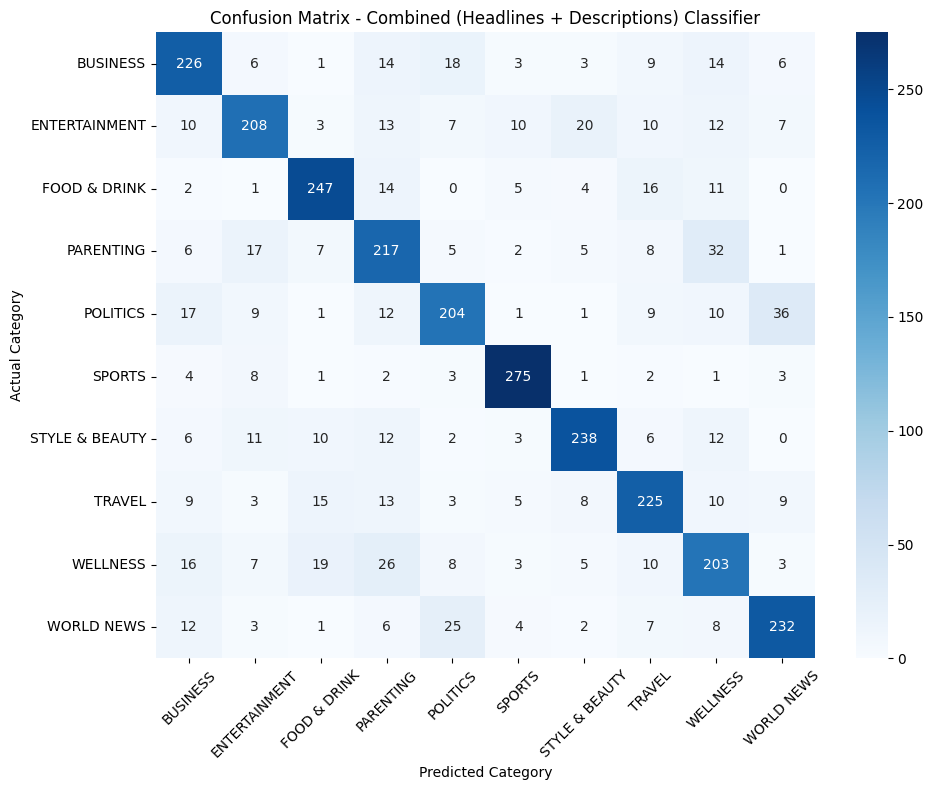

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the news dataset
data = pd.read_csv('parsed_news_data.csv')

# Step 2: Explore the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nCategory distribution:")
print(data['category'].value_counts())

# Step 3: Prepare combined text data and target
data['combined_text'] = data['headline'] + ' ' + data['short_description']  # Combine headline and description
X_text = data['combined_text']  # Combined text data for classification
y = data['category']  # Target labels

# Step 4: Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Vectorize the text data
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

# Step 6: Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test_vec)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nCombined (Headlines + Descriptions) Model Results:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(data['category'].unique()), 
            yticklabels=sorted(data['category'].unique()))
plt.title('Confusion Matrix - Combined (Headlines + Descriptions) Classifier')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()